# Medical Insurance Cost Prediction with Linear Regression

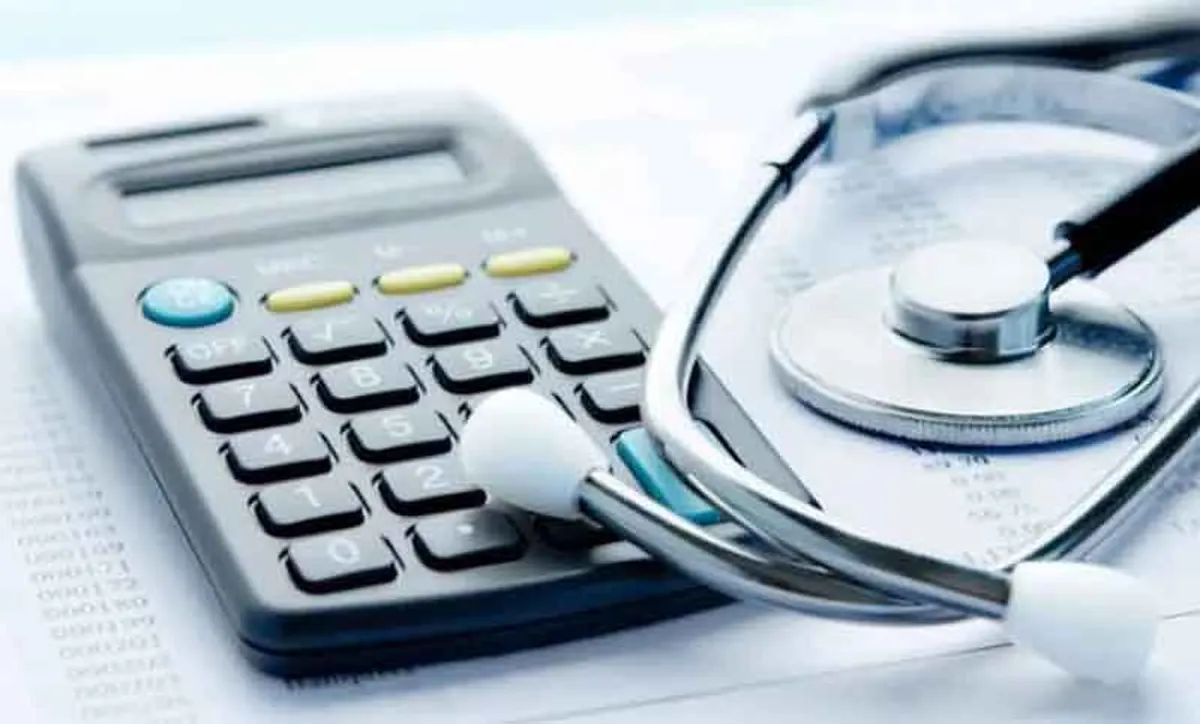

In this dataset, various features are observed to influence the cost of individuals' medical insurance. Our aim is to analyze which of these features have the most significant impact on the final charges and to develop predictive models accordingly.

Source: https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [89]:
import pandas as pd

In [90]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [91]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [92]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [93]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Age



In [94]:
fig = px.histogram(insurance_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

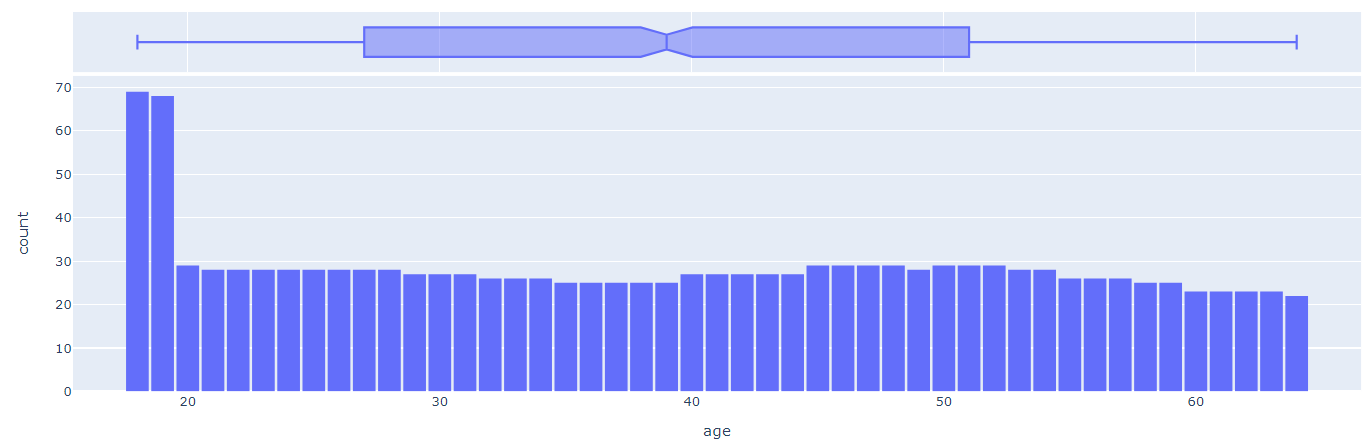

## Body Mass Index

In [95]:
fig = px.histogram(insurance_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

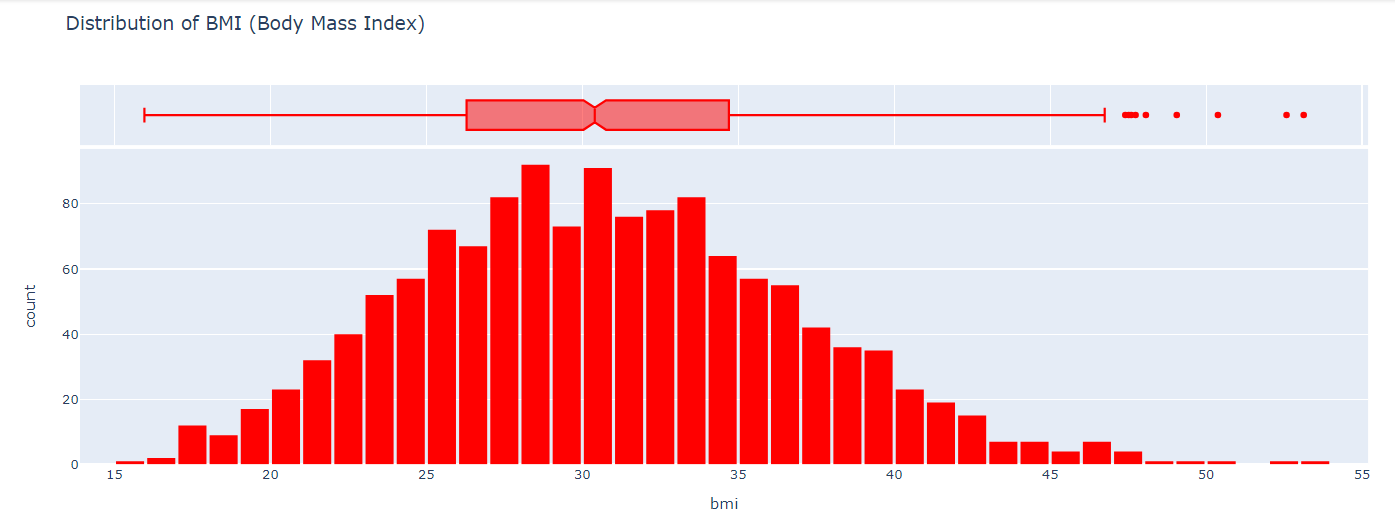

The median value is around 30. Considering that a healthy BMI typically falls within the range of 18.5 to 25, it's noticeable that the majority of patients in this dataset exceed these healthy parameters

## Charges

In [96]:
fig = px.histogram(insurance_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

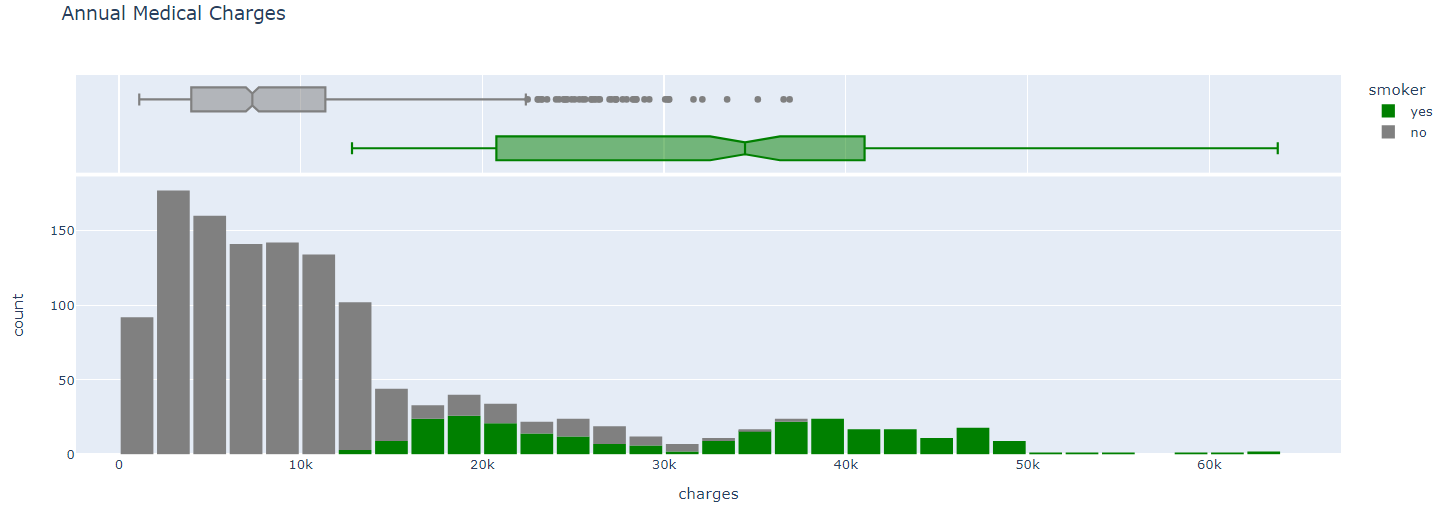

We can clearly see a substantial difference in charges between smokers and non-smokers. The median charge for non-smokers is 7345, whereas for smokers, it sharply increases to 34456.

We'll try to evaluate how charges can vary for different sex and reigon:

In [97]:
fig = px.histogram(insurance_df,
                   x='charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=['green', 'grey'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

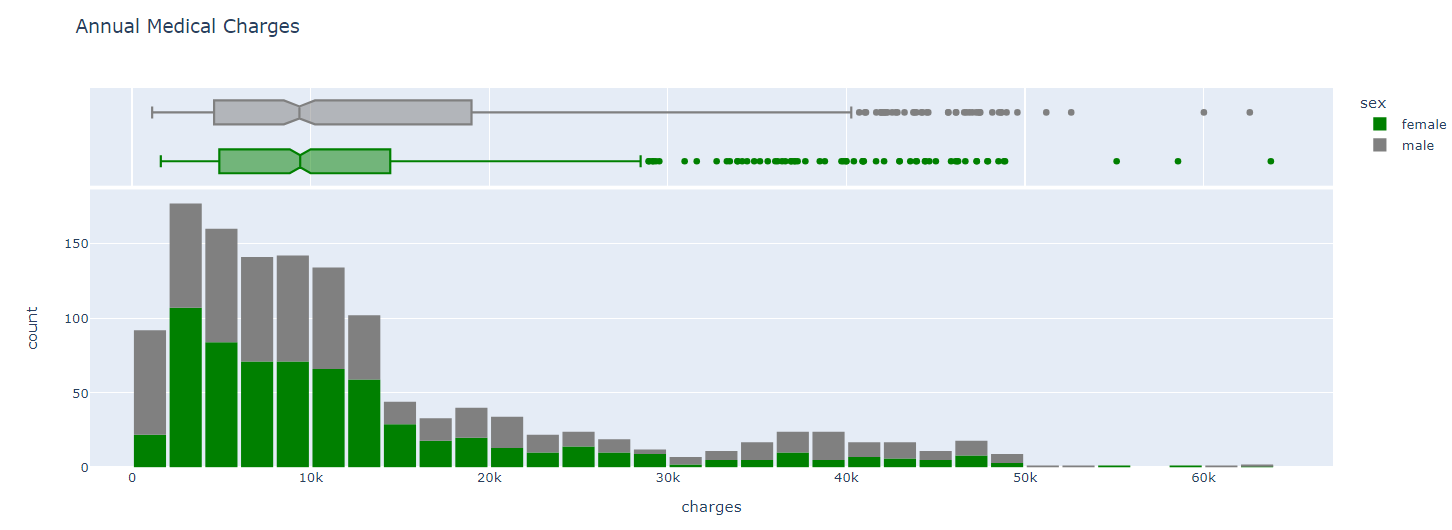

In [98]:
fig = px.histogram(insurance_df,
                   x='charges',
                   marginal='box',
                   color='region',
                   color_discrete_sequence=['red', 'blue', 'orange', 'green'],
                   title='Annual Medical Charges')
fig.update_layout(bargap=0.1)
fig.show()

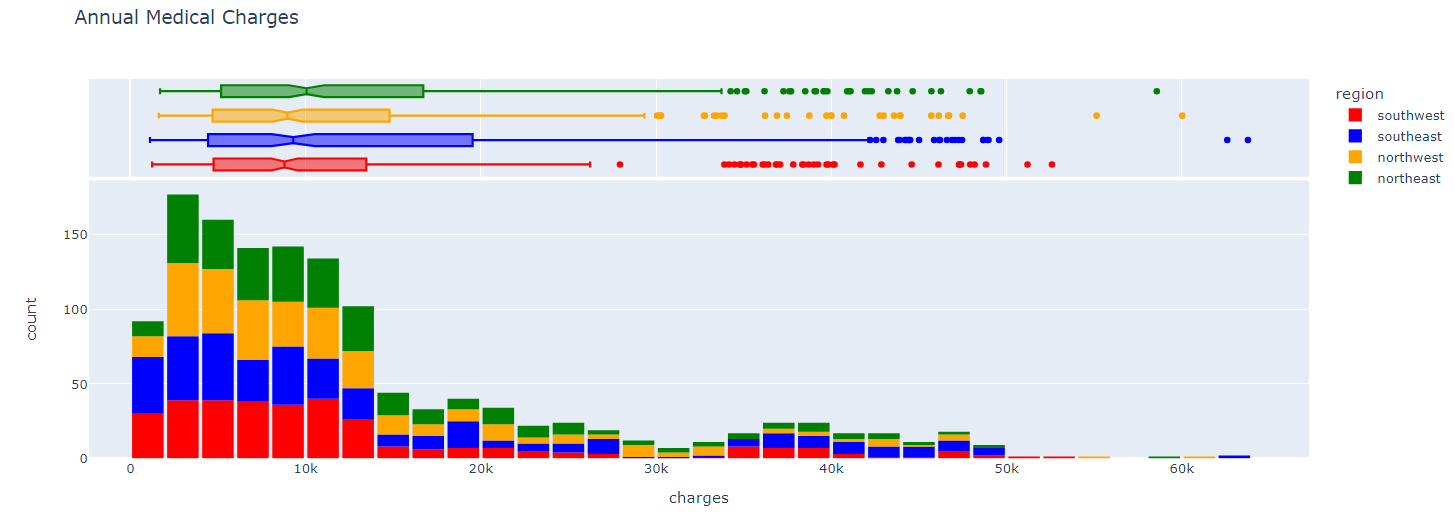

Based on the graphs show above, there isn't a significant correlation observed between these last two variables and the increase of the final charges.

## Smoker

In [99]:
px.histogram(insurance_df, x='smoker', color='sex', title='Male vs Female smokers')


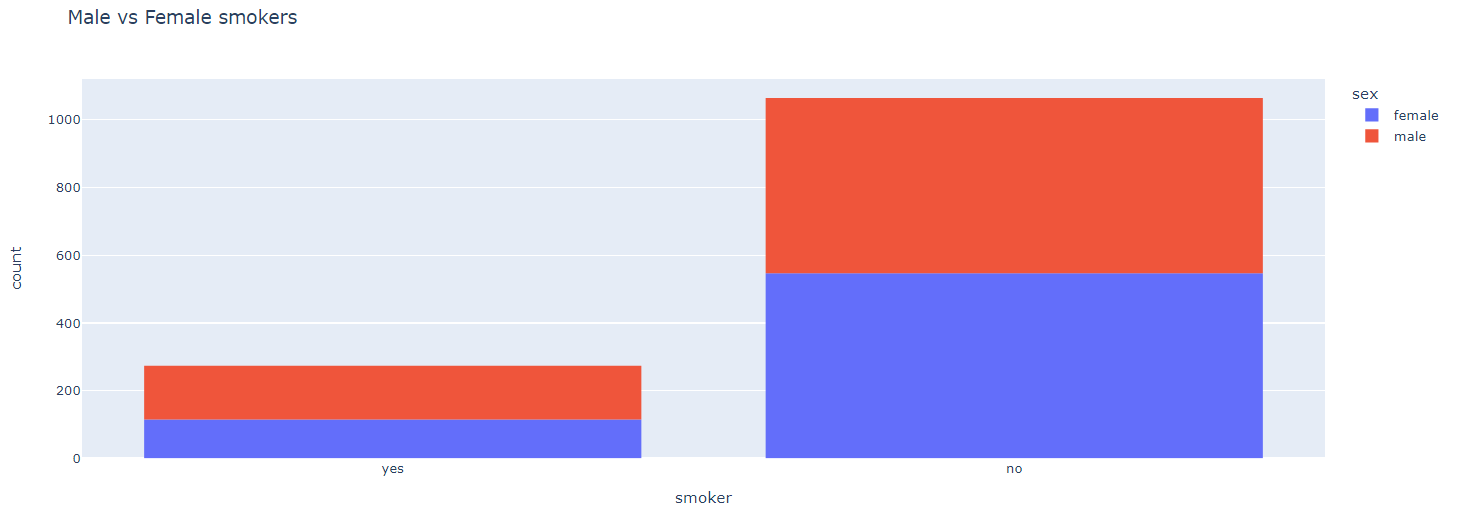

In the graphic above we can see how there's a bigger proportion of male than female smokers.

## Age and Charges

We are going to observe how age affects the charges. We will also observe how other categorical variables such as smoker, sex or ragion affect it.

<Figure size 1600x800 with 0 Axes>

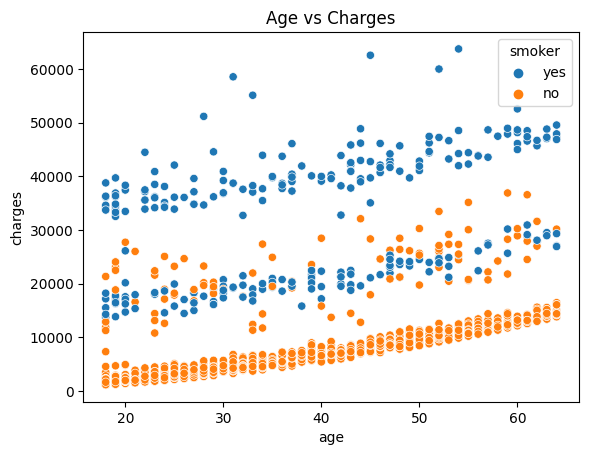

<Figure size 1600x800 with 0 Axes>

In [100]:
sns.scatterplot(insurance_df,
                x='age',
                y='charges',
                hue='smoker')
plt.title('Age vs Charges')
plt.figure(figsize=[16,8])

<Figure size 1600x800 with 0 Axes>

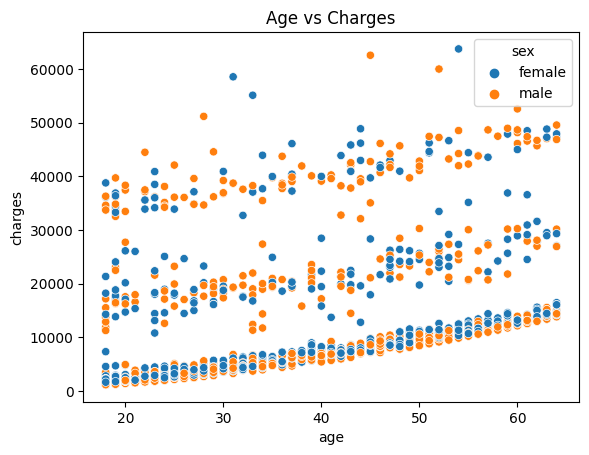

<Figure size 1600x800 with 0 Axes>

In [101]:
sns.scatterplot(insurance_df,
                x='age',
                y='charges',
                hue='sex'
)
plt.title('Age vs Charges')
plt.figure(figsize=[16,8])

<Figure size 1600x800 with 0 Axes>

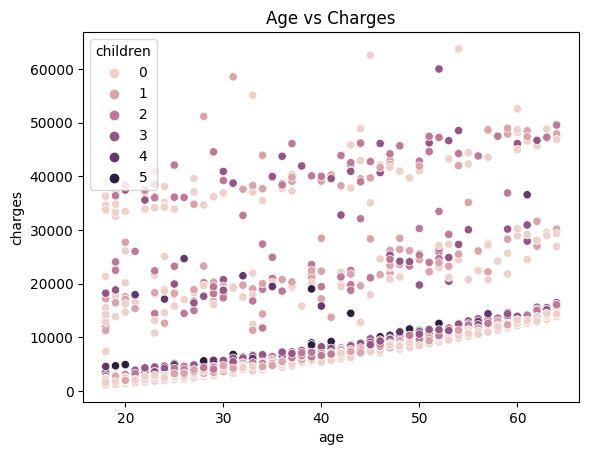

<Figure size 1600x800 with 0 Axes>

In [102]:
sns.scatterplot(insurance_df,
                x='age',
                y='charges',
                hue='children'
)
plt.title('Age vs Charges')
plt.figure(figsize=[16,8])

<Figure size 1600x800 with 0 Axes>

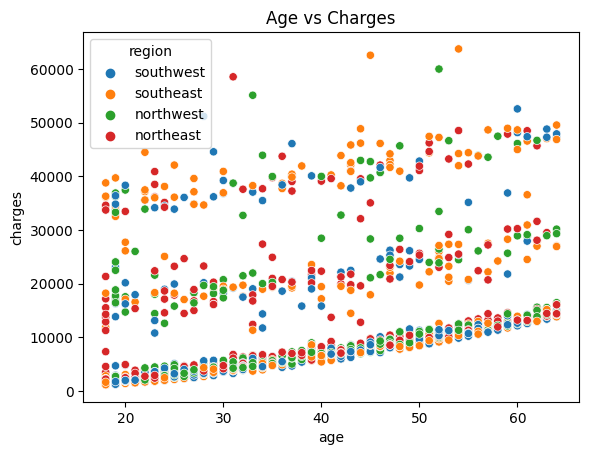

<Figure size 1600x800 with 0 Axes>

In [103]:
sns.scatterplot(insurance_df,
                x='age',
                y='charges',
                hue='region'
)
plt.title('Age vs Charges')
plt.figure(figsize=[16,8])

## BMI vs Charges

<Figure size 1600x800 with 0 Axes>

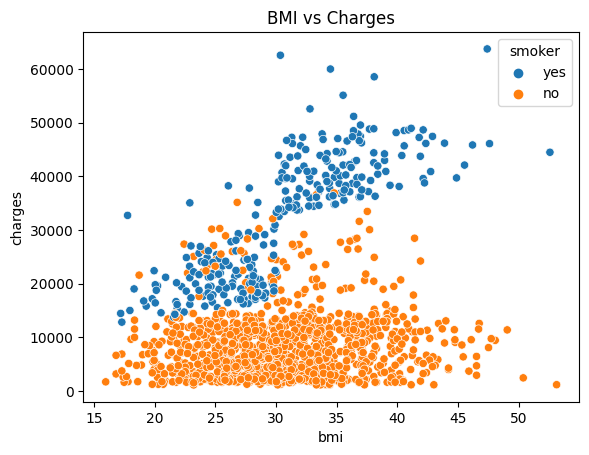

<Figure size 1600x800 with 0 Axes>

In [104]:
sns.scatterplot(insurance_df,
                x='bmi',
                y='charges',
                hue='smoker'
)
plt.title('BMI vs Charges')
plt.figure(figsize=[16,8])

We have observed how 'smoker' is the only variable that significantly affects the charges.

# Correlations

First of all, we're going to encode the categorical data:

In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
encoder = LabelEncoder()

In [107]:
encoder.fit(insurance_df.sex.drop_duplicates())
insurance_df.sex = encoder.transform(insurance_df.sex)
encoder.fit(insurance_df.smoker.drop_duplicates())
insurance_df.smoker = encoder.transform(insurance_df.smoker)

In [108]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [109]:
insurance_df.corr()

<ipython-input-109-a2eb4c6ec7ce>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,sex,bmi,children,smoker,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000


<ipython-input-110-f00dae96ea40>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



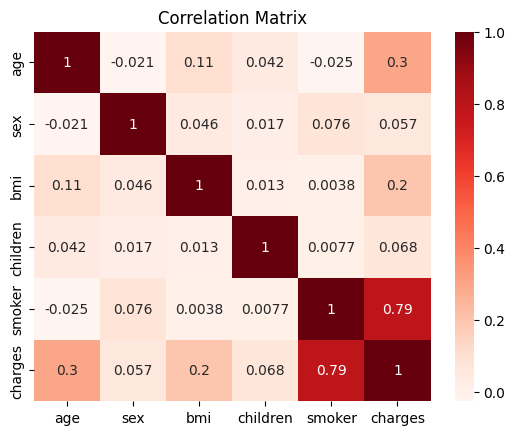

In [110]:
sns.heatmap(insurance_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

We can observe how 'smoker' is the only significantly correlated variable, followed by 'age' and 'bmi', but with a rather weak correlation.

# Data Preparation

## Encoding Data

Firstly, to utilize every feature, it's necessary to encode the categorical columns that have more than 2 classes:

In [111]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [112]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(insurance_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [113]:
one_hot = enc.transform(insurance_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [114]:
insurance_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot


In [115]:
insurance_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


## Scaling Data

In [116]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(insurance_df[numeric_cols])

StandardScaler()

In [117]:
scaled_inputs = scaler.transform(insurance_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

In [118]:
cat_cols = ['smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = insurance_df[cat_cols].values

# Linear Regression

In [119]:
x = np.concatenate((scaled_inputs, categorical_data), axis=1)
y = insurance_df.charges

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x_train, y_train)

predictions = model.predict(x_test)

print('Intercept : ', model.intercept_)
print('Coeficients : ', model.coef_)
print('RMSE:', np.sqrt(MSE(y_test, predictions)))
print('Score : ', model.score(x_test, y_test))

Intercept :  8486.496738097187
Coeficients :  [ 3.60914902e+03  2.05488506e+03  5.12478869e+02  2.36511289e+04
 -1.85916916e+01  4.59585244e+02  8.89079180e+01 -1.98279052e+02
 -3.50214110e+02]
Loss: 5796.2846592762735
Score :  0.7835929767120723


# Decision Trees

In [131]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

tree.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [132]:
from sklearn.metrics import mean_squared_error
import numpy as np

tree_train_preds = tree.predict(x_train)
tree_train_rmse = np.sqrt(mean_squared_error(y_train, tree_train_preds))

tree_test_preds = tree.predict(x_test)
tree_test_rmse = np.sqrt(mean_squared_error(y_test, tree_test_preds))

tree_score = tree.score(x_test,y_test)

print('Train RMSE: {}, Test RMSE: {}, Score: {}'.format(tree_train_rmse, tree_test_rmse, tree_score))

Train RMSE: 494.20598375812835, Test RMSE: 6724.474988964125, Score: 0.7087347288270747


# Random Forest

In [126]:
from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor()
rf1.fit(x_train, y_train)

RandomForestRegressor()

In [127]:
rf1_train_preds = rf1.predict(x_train)
rf1_train_rmse = np.sqrt(mean_squared_error(y_train, rf1_train_preds))

In [128]:
rf1_test_preds = rf1.predict(x_test)
rf1_test_rmse = np.sqrt(mean_squared_error(y_test, rf1_test_preds))

In [129]:
rf1_score = rf1.score(x_test, y_test)

In [130]:
print('Train RMSE: {}, Test RMSE: {}, Score: {}'.format(rf1_train_rmse, rf1_test_rmse, rf1_score))

Train RMSE: 1893.2250224066668, Test RMSE: 4633.99624492219, Score: 0.861680536828793


In [136]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(x_train, y_train)
    train_rmse = mean_squared_error(model.predict(x_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(x_test), y_test, squared=False)
    return train_rmse, val_rmse

In [137]:
test_params(n_estimators=20, max_depth=20)

(2089.747738696448, 4776.438864974322)

In [138]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(3865.8441580870726, 4590.470036028916)

In [142]:
def test_param_and_plot(param_name, param_values):
    train_errors, test_errors = [], []
    for value in param_values:
        params = {param_name: value}
        train_rmse, test_rmse = test_params(**params)
        train_errors.append(train_rmse)
        test_errors.append(test_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, test_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

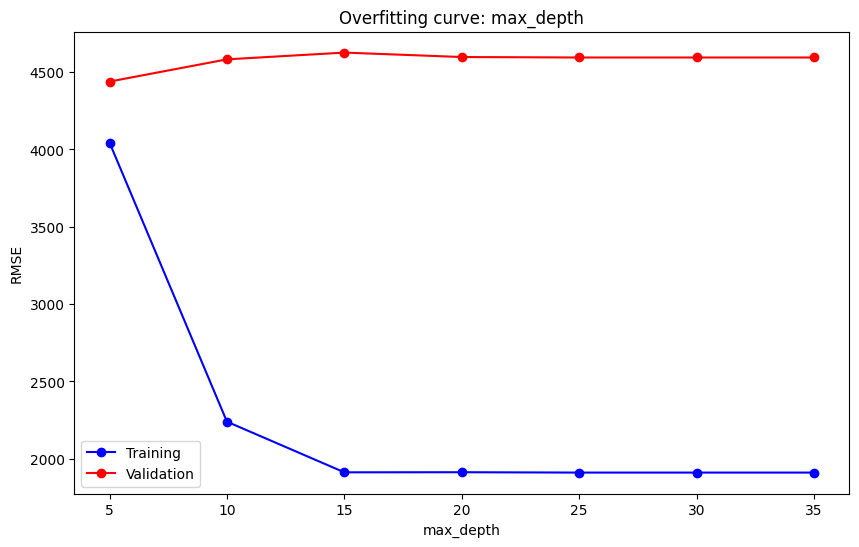

In [143]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

In [149]:
rf2 = RandomForestRegressor(max_depth=5)
rf2.fit(x_train, y_train)

rf2_train_preds = rf1.predict(x_train)
rf2_train_rmse = np.sqrt(mean_squared_error(y_train, rf2_train_preds))

rf2_test_preds = rf1.predict(x_test)
rf2_test_rmse = np.sqrt(mean_squared_error(y_test, rf2_test_preds))

rf2_score = rf2.score(x_test, y_test)

print('Train RMSE: {}, Test RMSE: {}, Score: {}'.format(rf2_train_rmse, rf2_test_rmse, rf2_score))

Train RMSE: 1893.2250224066668, Test RMSE: 4633.99624492219, Score: 0.8738593738455394


So, we find that the best model is a random forest with maximum depth 5